<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/final/trustlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** INTRODUCTION**
This is a db with categorical and descriptive data of customers in a U.S business unit.

The business is dedicated to rent cars to customers and the objectives of this machine learning model is to categorize if the customers has a high, medium or low trust level.

High level indicates that I should rent.

Medium possible danger and so it needs to go over second operational revision process.

Low must not rent the car.

** The numbers, names have been changed to protect the data **

## Libraries- Dataset

In [1]:
#!pip install ydata_profiling # data Table Analysis
#!pip install typing_extensions # data Table Analysis
#!pip install imblearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for graphs
from sklearn.model_selection import train_test_split #Model Split to train
from sklearn.metrics import accuracy_score           #Accuracy model
from sklearn.preprocessing import StandardScaler


In [2]:
cus = pd.read_csv('/content/cust_test.csv')

In [3]:
cus.head(5)


,cust_id,month_birth,dob,year_birth,Unnamed: 4,country,times,cash_vs_card,pay_level,marital,level_edu,salary
0,1,3,14,1994,NaN,UTAH,4,cash,LOW,married,elementary,211637
1,2,5,6,1970,NaN,MEXICO,1,cash,HIGH,single,elementary,129657
2,3,5,17,1973,NaN,UTAH,1,cash,LOW,married,high_school,160686
3,4,5,9,1976,NaN,MEXICO,5,cash,HIGH,married,college,86044
4,5,4,29,1989,NaN,MEXICO,1,card,HIGH,married,high_school,192280



## Table Description

In [4]:
cus.describe(include='all')
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49512 entries, 0 to 49511
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cust_id        49512 non-null  int64  
 1    month_birth   49512 non-null  int64  
 2   dob            49512 non-null  int64  
 3   year_birth     49512 non-null  int64  
 4   Unnamed: 4     0 non-null      float64
 5   country        49512 non-null  object 
 6   times          49512 non-null  int64  
 7   cash_vs_card   49512 non-null  object 
 8   pay_level      49512 non-null  object 
 9   marital        49512 non-null  object 
 10  level_edu      49512 non-null  object 
 11  salary         49512 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 4.5+ MB


In [5]:
cus.nunique()


cust_id          49512
 month_birth        12
dob                 31
year_birth          89
Unnamed: 4           0
country             11
times              168
cash_vs_card         3
pay_level            3
marital              2
level_edu            4
salary           43768
dtype: int64

In [6]:
#nun values
nan_count = cus.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 49512


## Data Wrangling - Missing Values, transformation


https://jamesrledoux.com/code/imputation

In [7]:
#unkown values

(cus=='unknown').sum()

cust_id          0
 month_birth     0
dob              0
year_birth       0
Unnamed: 4       0
country          0
times            0
cash_vs_card     0
pay_level        0
marital          0
level_edu        0
salary           0
dtype: int64

In [8]:
df_im=cus

<ipython-input-9-cc359407d008>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_im.corr()


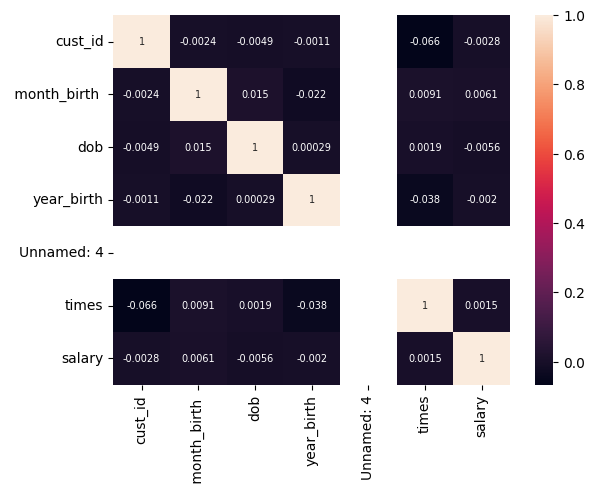

<Figure size 2000x1000 with 0 Axes>

,cust_id,month_birth,dob,year_birth,Unnamed: 4,times,salary
cust_id,1.000000,-0.002359,-0.004904,-0.001130,NaN,-0.066330,-0.002792
month_birth,-0.002359,1.000000,0.014912,-0.022193,NaN,0.009072,0.006117
dob,-0.004904,0.014912,1.000000,0.000293,NaN,0.001878,-0.005554
year_birth,-0.001130,-0.022193,0.000293,1.000000,NaN,-0.038232,-0.001995
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
times,-0.066330,0.009072,0.001878,-0.038232,NaN,1.000000,0.001538
salary,-0.002792,0.006117,-0.005554,-0.001995,NaN,0.001538,1.000000


In [9]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

## Encoded Values

In [10]:
df_im['pay_level'].unique()

array(['LOW', 'HIGH', 'MEDIUM'], dtype=object)

In [11]:
# label encoded values

df_im['country'] = df_im['country'].astype('category')
df_im['cash_vs_card'] = df_im['cash_vs_card'].astype('category')
df_im['level_edu'] = df_im['level_edu'].astype('category')
df_im['marital'] = df_im['marital'].astype('category')


# cat codes
df_im['country'] = df_im['country'].cat.codes
df_im['cash_vs_card'] = df_im['cash_vs_card'].cat.codes
df_im['level_edu'] = df_im['level_edu'].cat.codes
df_im['marital']=df_im['marital'].cat.codes



df_im.columns

In [12]:
import numpy as np

In [13]:
df_im['pay_level'].unique()

array(['LOW', 'HIGH', 'MEDIUM'], dtype=object)

In [14]:
conditions = [
    df_im["pay_level"] == "LOW",
    df_im["pay_level"] == "MEDIUM",
    df_im["pay_level"] == "HIGH"
]
values = [1, 2, 3]

# Apply np.select
df_im['pay_level'] = np.select(conditions, values, default=0)

In [15]:
df_im['pay_level']. unique()

array([1, 3, 2])

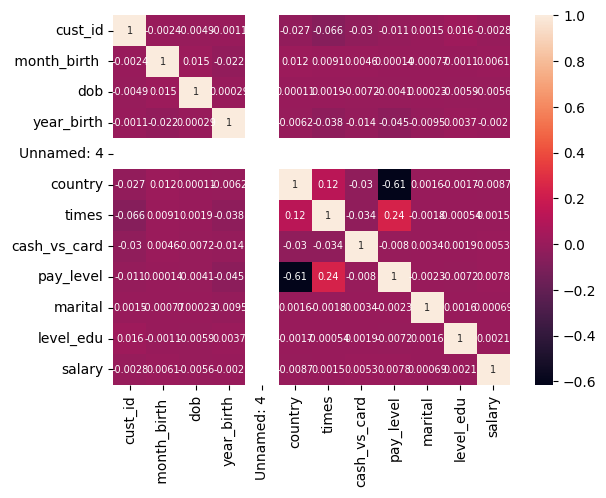

<Figure size 2000x1000 with 0 Axes>

,cust_id,month_birth,dob,year_birth,Unnamed: 4,country,times,cash_vs_card,pay_level,marital,level_edu,salary
cust_id,1.000000,-0.002359,-0.004904,-0.001130,NaN,-0.027063,-0.066330,-0.029587,-0.011039,0.001495,0.016253,-0.002792
month_birth,-0.002359,1.000000,0.014912,-0.022193,NaN,0.011982,0.009072,0.004646,0.000143,-0.000767,-0.001150,0.006117
dob,-0.004904,0.014912,1.000000,0.000293,NaN,0.000106,0.001878,-0.007235,-0.004053,0.000227,-0.005867,-0.005554
year_birth,-0.001130,-0.022193,0.000293,1.000000,NaN,-0.006241,-0.038232,-0.014356,-0.044591,-0.009534,0.003665,-0.001995
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,-0.027063,0.011982,0.000106,-0.006241,NaN,1.000000,0.123541,-0.029825,-0.614509,0.001571,-0.001655,-0.008678
times,-0.066330,0.009072,0.001878,-0.038232,NaN,0.123541,1.000000,-0.034138,0.237602,-0.001850,-0.000535,0.001538
cash_vs_card,-0.029587,0.004646,-0.007235,-0.014356,NaN,-0.029825,-0.034138,1.000000,-0.007997,0.003435,0.001852,0.005336
pay_level,-0.011039,0.000143,-0.004053,-0.044591,NaN,-0.614509,0.237602,-0.007997,1.000000,-0.002287,-0.007175,0.007771
marital,0.001495,-0.000767,0.000227,-0.009534,NaN,0.001571,-0.001850,0.003435,-0.002287,1.000000,0.001581,0.000687


In [16]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

## Standarized

In [17]:
# Use StandardScaler() to normolize data around a mean of 0

## Data Table Analysis

In [18]:
'''sns.set()
sns.set_style('white')
graph1=sns.histplot(data=df_im, x='age', bins='auto')#hue='species'
graph1.set_title("Age Histogram")'''

'sns.set()\nsns.set_style(\'white\')\ngraph1=sns.histplot(data=df_im, x=\'age\', bins=\'auto\')#hue=\'species\'\ngraph1.set_title("Age Histogram")'

In [19]:
'''sns.set()
sns.set_style('white')

graph2 = sns.countplot(data=df_im, x='poutcome', hue='marital')

# Create a FacetGrid for further customization
facet_grid = sns.FacetGrid(df_im, row="contact", col='marital', # row="education"
                            height=5, aspect=1)#col_wrap=2
# Map the countplot onto the FacetGrid
facet_grid.map(sns.countplot, "poutcome", order=df_im['poutcome'].unique())
# Add a legend
facet_grid.add_legend(title='Marital Status', bbox_to_anchor=(1, 1))
# Set the overall title
facet_grid.fig.suptitle("Response by Marital Status and Education", y=1.02)
facet_grid.set_titles(fontsize=25)
plt.show()
'''

'sns.set()\nsns.set_style(\'white\')\n\ngraph2 = sns.countplot(data=df_im, x=\'poutcome\', hue=\'marital\')\n\n# Create a FacetGrid for further customization\nfacet_grid = sns.FacetGrid(df_im, row="contact", col=\'marital\', # row="education"\n                            height=5, aspect=1)#col_wrap=2\n# Map the countplot onto the FacetGrid\nfacet_grid.map(sns.countplot, "poutcome", order=df_im[\'poutcome\'].unique())\n# Add a legend\nfacet_grid.add_legend(title=\'Marital Status\', bbox_to_anchor=(1, 1))\n# Set the overall title\nfacet_grid.fig.suptitle("Response by Marital Status and Education", y=1.02)\nfacet_grid.set_titles(fontsize=25)\nplt.show()\n'

In [20]:
#!pip install typing_extensions

In [21]:
#from ydata_profiling import ProfileReport, compare

In [22]:
'''report= ProfileReport(df=df_im, title="test")
report.to_notebook_iframe()'''

'report= ProfileReport(df=df_im, title="test")\nreport.to_notebook_iframe()'

# Machine Learning Model




In [23]:
pd.set_option('display.max_columns', None)
df_im.head(5)

,cust_id,month_birth,dob,year_birth,Unnamed: 4,country,times,cash_vs_card,pay_level,marital,level_edu,salary
0,1,3,14,1994,NaN,10,4,1,1,0,1,211637
1,2,5,6,1970,NaN,6,1,1,3,1,1,129657
2,3,5,17,1973,NaN,10,1,1,1,0,2,160686
3,4,5,9,1976,NaN,6,5,1,3,0,0,86044
4,5,4,29,1989,NaN,6,1,0,3,0,2,192280


In [24]:
df_im.columns

Index(['cust_id', ' month_birth ', 'dob', 'year_birth', 'Unnamed: 4',
       'country', 'times', 'cash_vs_card', 'pay_level', 'marital', 'level_edu',
       'salary'],
      dtype='object')

In [25]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions
X = df_im[['cust_id', ' month_birth ', 'dob', 'year_birth',
       'country', 'times', 'cash_vs_card', 'marital', 'level_edu',
       'salary']]
X.head(5)

,cust_id,month_birth,dob,year_birth,country,times,cash_vs_card,marital,level_edu,salary
0,1,3,14,1994,10,4,1,0,1,211637
1,2,5,6,1970,6,1,1,1,1,129657
2,3,5,17,1973,10,1,1,0,2,160686
3,4,5,9,1976,6,5,1,0,0,86044
4,5,4,29,1989,6,1,0,0,2,192280


In [26]:
# Create a new dataframe called y that contians the target we're
# trying to predict
y=df_im['pay_level']
y.unique()

array([1, 3, 2])

## Split Data

In [27]:

# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.3, random_state=1)

# Use StandardScaler() to normolize data around a mean of 0
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_test_scaled)



[[ 0.15547076  1.30820003  1.41559863 ...  1.03896025  0.23235908
  -0.63672668]
 [-1.42542451  0.43220234  0.50385324 ... -0.96250073  1.14925546
  -0.3779746 ]
 [-0.93978599 -1.02779382  1.75750316 ... -0.96250073 -1.60143368
   0.35701523]
 ...
 [-1.70737722  0.43220234  0.95972594 ... -0.96250073  1.14925546
  -0.30203328]
 [ 0.05630071 -0.73579459 -0.52186033 ... -0.96250073 -1.60143368
   1.3029339 ]
 [ 1.25196114  1.0162008   1.07369411 ... -0.96250073  0.23235908
  -0.00581358]]


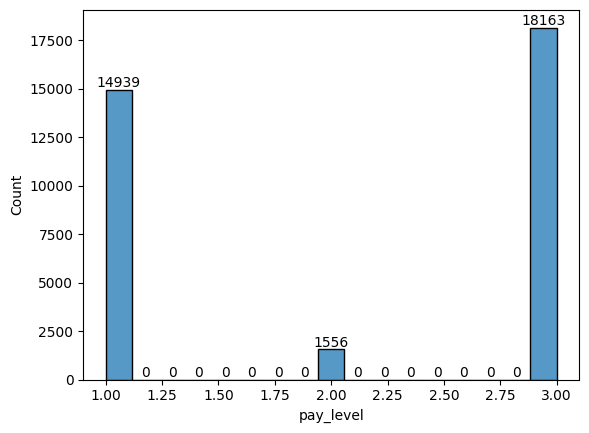

In [28]:
# it seems that my Y training is imbalance becasue the non existing is bigger than other outcomes
ax=sns.histplot(data=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Dealing with imbalance

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [29]:
!pip install imblearn

In [30]:
'''from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

X_new, y_new= rus.fit_resample(X_train_scaled, y_train)#X_train_scaled  X_train

y_new.value_counts()'''

'from imblearn.under_sampling import RandomUnderSampler\nrus = RandomUnderSampler(random_state=1)\n\nX_new, y_new= rus.fit_resample(X_train_scaled, y_train)#X_train_scaled  X_train\n\ny_new.value_counts()'

In [31]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

ro = RandomOverSampler()

X_new, y_new = ro.fit_resample(X_train_scaled, y_train)

y_new.value_counts()

3    18163
1    18163
2    18163
Name: pay_level, dtype: int64

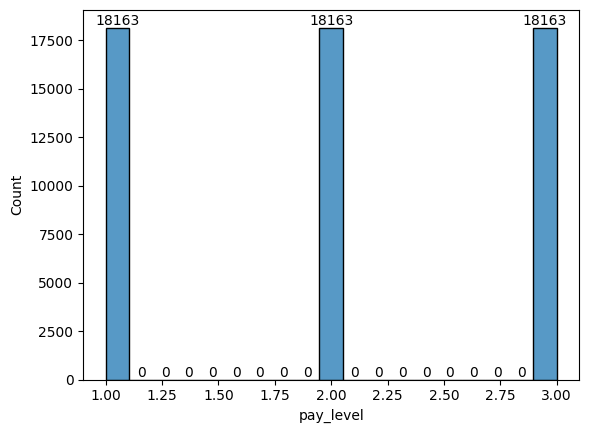

In [32]:
ax=sns.histplot(data=y_new)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Training the tree model

In [33]:
 from sklearn import tree

In [34]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)#max_leaf_nodes=10, random_state=0

In [35]:
clf = clf.fit(X_new, y_new)

[Text(0.5, 0.9285714285714286, 'x[5] <= -0.024\ngini = 0.667\nsamples = 54489\nvalue = [18163, 18163, 18163]'),
 Text(0.2, 0.7857142857142857, 'x[4] <= 0.451\ngini = 0.483\nsamples = 30688\nvalue = [18163, 0, 12525]'),
 Text(0.1, 0.6428571428571429, 'gini = 0.005\nsamples = 10541\nvalue = [25, 0, 10516]'),
 Text(0.3, 0.6428571428571429, 'x[5] <= -0.281\ngini = 0.18\nsamples = 20147\nvalue = [18138, 0, 2009]'),
 Text(0.2, 0.5, 'x[3] <= 0.035\ngini = 0.162\nsamples = 12534\nvalue = [11422, 0, 1112]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.187\nsamples = 5264\nvalue = [4716, 0, 548]'),
 Text(0.3, 0.35714285714285715, 'gini = 0.143\nsamples = 7270\nvalue = [6706, 0, 564]'),
 Text(0.4, 0.5, 'gini = 0.208\nsamples = 7613\nvalue = [6716, 0, 897]'),
 Text(0.8, 0.7857142857142857, 'x[5] <= 0.232\ngini = 0.362\nsamples = 23801\nvalue = [0, 18163, 5638]'),
 Text(0.7, 0.6428571428571429, 'x[4] <= 0.451\ngini = 0.096\nsamples = 19130\nvalue = [0, 18163, 967]'),
 Text(0.6, 0.5, 'x[4] <= -1.68\ng

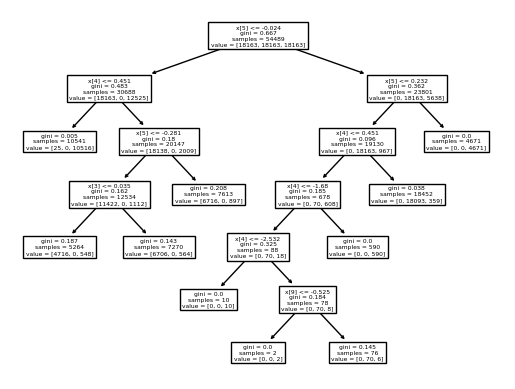

In [36]:
tree.plot_tree(clf)

In [54]:

# Identify the most important columns
# The zip function pairs each object
importance = clf.feature_importances_
df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])
#print(importance,X.columns.to_list())

df = df.sort_values(by='importance')



<Axes: xlabel='importance', ylabel='feature'>

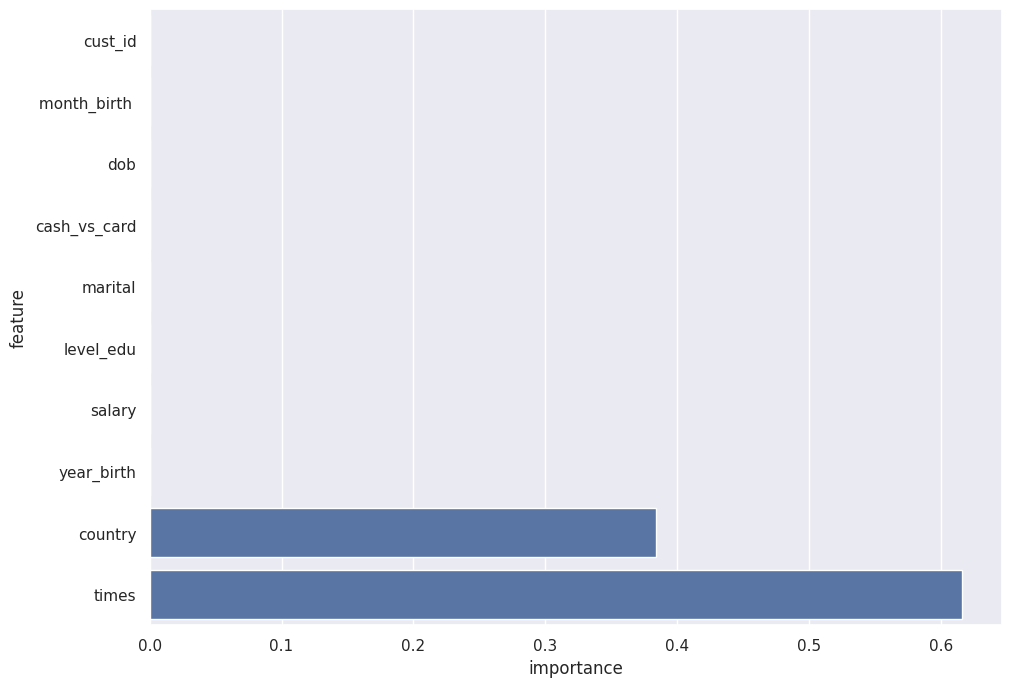

In [38]:
# Visualize a bar graph of feature importance scores
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(data=df,x='importance',y='feature')
# number employed is being used as an indicator of how the economy is doing

## Predictions with Model

In [39]:
test_predictions=clf.predict(X_test_scaled) #X_test_scaled

In [40]:
test_predictions

array([3, 1, 3, ..., 3, 3, 2])

In [41]:
y_train.count()

34658

## Evaluate

In [42]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

0.930119833041605

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93      6215
           2       0.80      1.00      0.89       691
           3       1.00      0.87      0.93      7948

    accuracy                           0.93     14854
   macro avg       0.89      0.96      0.92     14854
weighted avg       0.94      0.93      0.93     14854



In [44]:
# confution Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_predictions)

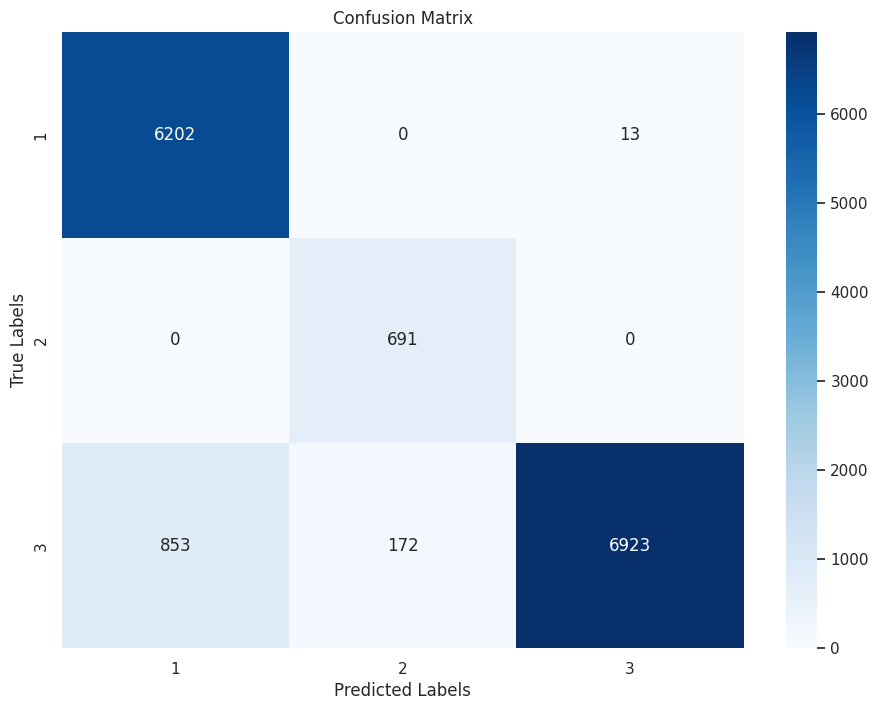

In [45]:
import numpy as np
import matplotlib.pyplot as plt
sns.set()

unique_labels = np.unique(y_test)

sns.heatmap(cm,fmt="d", annot=True, cmap="Blues",
             xticklabels=unique_labels, yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Use model